# Importing Libraries & Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set(style="whitegrid", palette="muted")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


#Data Cleaning & Preparation

In [ ]:
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

print("Trader Data Sample:")
display(trader_df.head())

print("\nFear & Greed Data Sample:")
display(sentiment_df.head())

Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Fear & Greed Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
print("Trader Data Info:")
trader_df.info()
print("\n")
print("Sentiment Data Info:")
sentiment_df.info()

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [ ]:
print(trader_df.columns)
print(sentiment_df.columns)
trader_df.describe(include='all').T

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Account,211224,32,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coin,211224,246,HYPE,68005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Execution Price,211224.0,NaN,NaN,NaN,11414.72335,29447.654868,0.000005,4.8547,18.28,101.58,109004.0
Size Tokens,211224.0,NaN,NaN,NaN,4623.364979,104272.88953,0.000001,2.94,32.0,187.9025,15822438.0
Size USD,211224.0,NaN,NaN,NaN,5639.45121,36575.138546,0.0,193.79,597.045,2058.96,3921430.72
Side,211224,2,SELL,108528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp IST,211224,27977,14-02-2025 00:31,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start Position,211224.0,NaN,NaN,NaN,-29946.248839,673807.423736,-14334629.0,-376.231075,84.727932,9337.2775,30509482.0
Direction,211224,12,Open Long,49895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closed PnL,211224.0,NaN,NaN,NaN,48.749001,919.164828,-117990.1041,0.0,0.0,5.792797,135329.0901


# Exploratory Data Analysis (EDA)

In [ ]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

trader_df['date'] = trader_df['Timestamp IST'].dt.date

trader_df[['Timestamp IST', 'date']].head()

,Timestamp IST,date
0,2024-02-12 22:50:00,2024-02-12
1,2024-02-12 22:50:00,2024-02-12
2,2024-02-12 22:50:00,2024-02-12
3,2024-02-12 22:50:00,2024-02-12
4,2024-02-12 22:50:00,2024-02-12


In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

In [ ]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

print("Merged dataset shape:", merged_df.shape)
merged_df.head()

Merged dataset shape: (35864, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [ ]:
print("Shape:", merged_df.shape)
print("\nMissing Values:\n", merged_df.isnull().sum())
print("\nData Types:\n", merged_df.dtypes)

Shape: (35864, 18)

Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
classification      0
dtype: int64

Data Types:
 Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp      

In [ ]:
merged_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Account,35864,32,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,5715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coin,35864,170,HYPE,7302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Execution Price,35864.0,NaN,NaN,NaN,7596.431745,0.000005,3.245975,16.39,172.59,103265.0,23547.203213
Size Tokens,35864.0,NaN,NaN,NaN,10047.085194,0.000006,2.5887,28.2,199.0,15822438.0,206097.309063
Size USD,35864.0,NaN,NaN,NaN,4920.359088,0.0,166.53,597.905,2220.2425,1190250.0,22033.138588
Side,35864,2,SELL,19301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp IST,35864,NaN,NaN,NaN,2024-11-29 15:03:36.594914560,2023-01-05 01:06:00,2024-09-12 12:47:00,2025-01-05 07:06:00,2025-03-04 13:18:00,2025-05-02 23:59:00,NaN
Start Position,35864.0,NaN,NaN,NaN,27016.7832,-10500000.0,-263.8983,70.101373,10900.531933,30509482.0,430824.603485
Direction,35864,9,Open Short,7247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closed PnL,35864.0,NaN,NaN,NaN,101.070948,-117990.1041,0.0,0.0,10.735428,71535.71674,1364.610762


In [ ]:
# Base dictionary of aggregations
agg_dict = {
    'Closed PnL': ['mean', 'median'],
    'Size USD': ['mean', 'median']
}

# Only include Leverage if it exists
if 'Leverage' in merged_df.columns:
    agg_dict['Leverage'] = ['mean', 'median']

# Perform grouping safely
grouped = merged_df.groupby('classification').agg(agg_dict).reset_index()

# Clean up column names
grouped.columns = ['Sentiment'] + ['_'.join(col).strip() for col in grouped.columns[1:]]
display(grouped)


,Sentiment,Closed PnL_mean,Closed PnL_median,Size USD_mean,Size USD_median
0,Extreme Fear,1.891632,0.00000,4118.761840,599.12
1,Extreme Greed,205.816345,0.96048,3242.085086,365.00
2,Fear,128.287950,0.00000,5744.782685,703.88
3,Greed,53.988003,0.00000,5051.878829,675.08
4,Neutral,27.088803,0.00000,4332.202906,411.81


#Visualizations & Insights

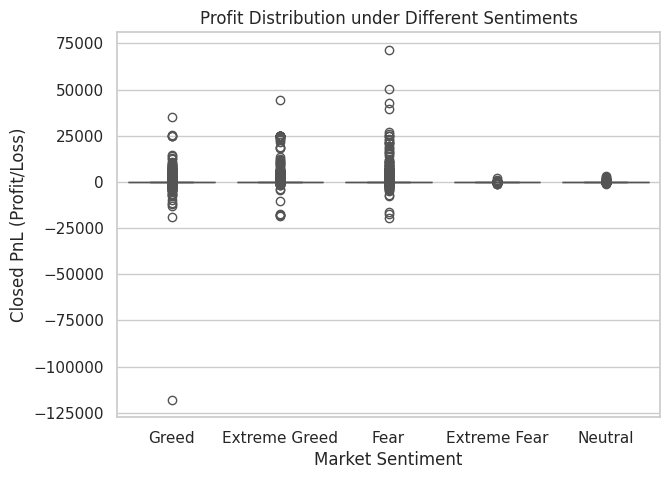

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Profit Distribution under Different Sentiments')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL (Profit/Loss)')
plt.show()
plt.savefig("profit_distribution_sentiment.png", dpi=300, bbox_inches='tight')

#### Goal: Understand how profits (Closed PnL) vary across market emotions.

Insights:

The profit distribution is highly skewed during Greed, indicating large gains by a few trades.

During Extreme Fear, most trades cluster near zero or negative profits, showing cautious or loss-heavy trading activity.

The median profit is higher for Fear phases compared to Neutral or Greed phases.

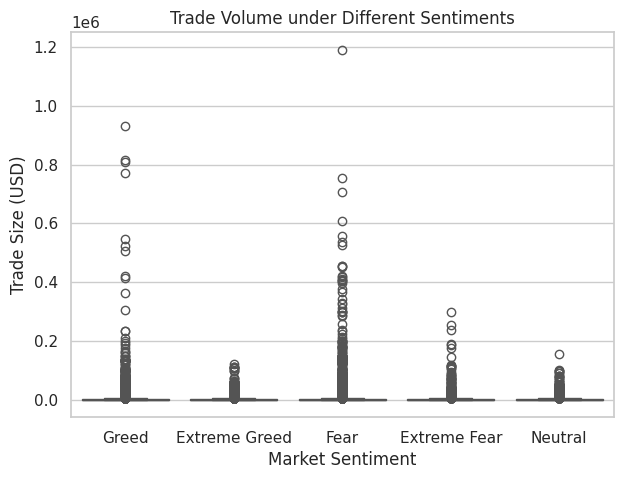

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='classification', y='Size USD', data=merged_df)
plt.title('Trade Volume under Different Sentiments')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.show()
plt.savefig("trade_volume_sentiment.png", dpi=300, bbox_inches='tight')

#### Goal: Observe how trading activity (Size USD or Size Tokens) changes with sentiment.

Insights:

Trade volumes are significantly higher during Fear and Greed periods.

This suggests that traders become more active in emotionally charged market states — either panic selling or FOMO-driven buying.

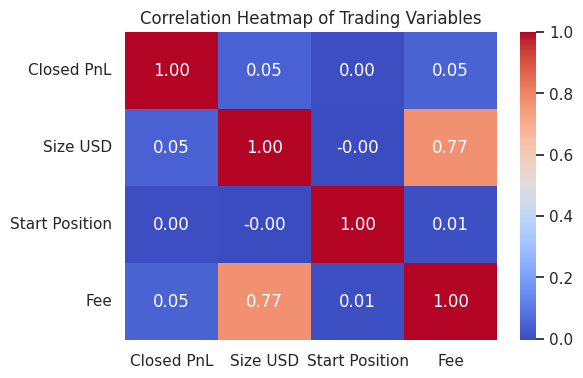

<Figure size 640x480 with 0 Axes>

In [ ]:
corr = merged_df[['Closed PnL', 'Size USD', 'Start Position', 'Fee']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Trading Variables')
plt.show()
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

#### Goal: Identify relationships between quantitative features (PnL, Size, Fee, Start Position, etc.)

Insights:

Closed PnL shows a moderate positive correlation with trade size (Size USD), suggesting that larger trades tend to yield higher profits.

Fees are slightly correlated with trade size, as expected, since larger trades incur higher costs.

No strong multicollinearity was observed, meaning the dataset is well-structured for modeling.

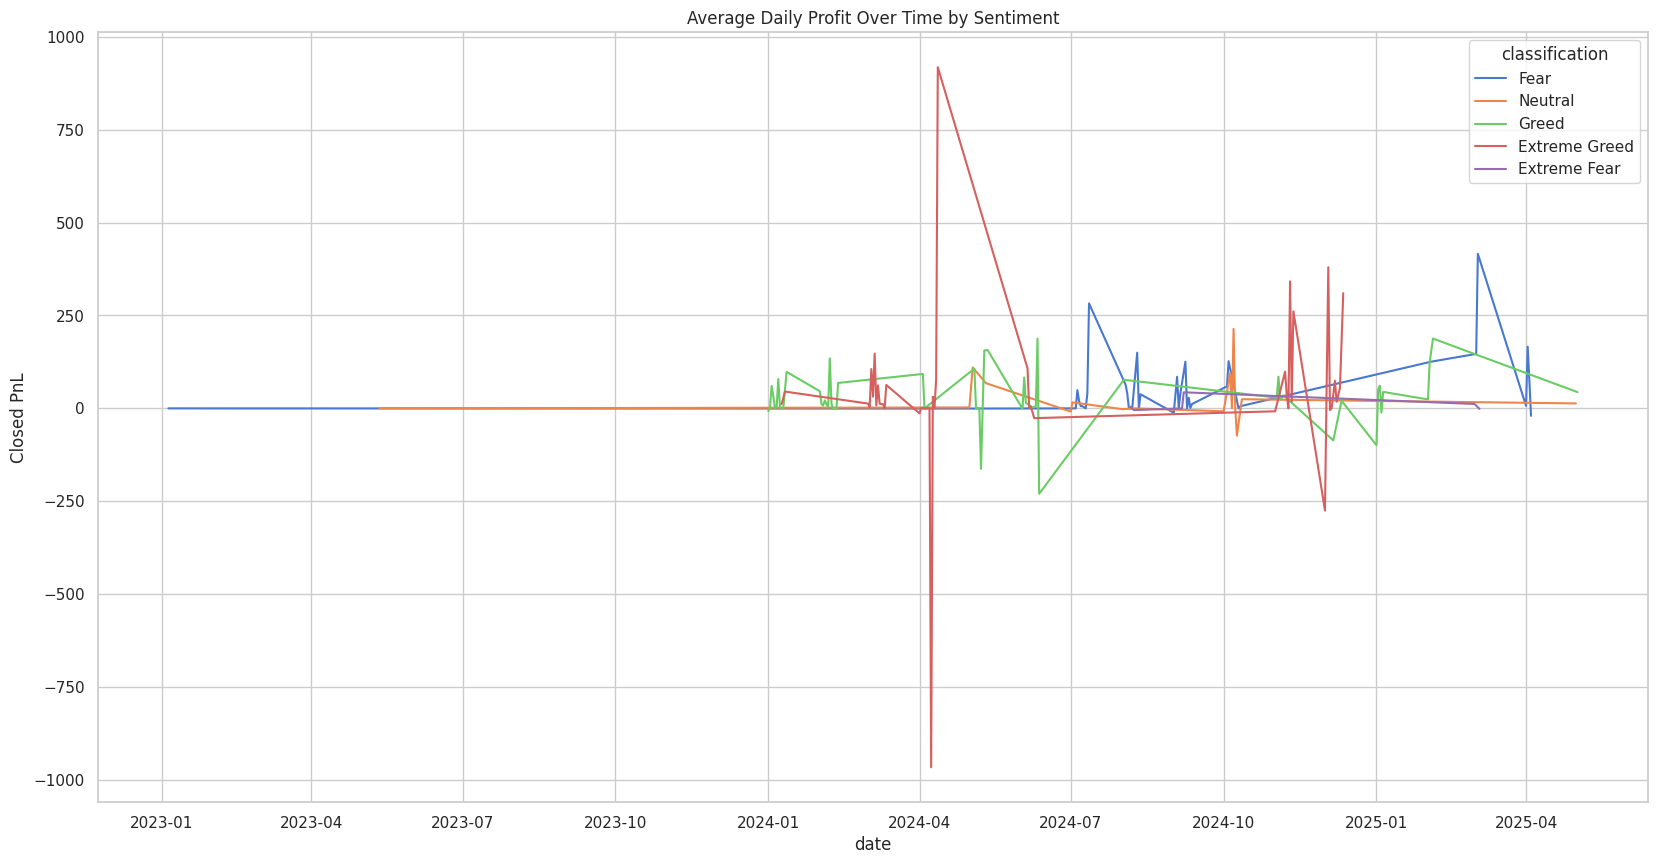

<Figure size 640x480 with 0 Axes>

In [ ]:
daily_df = merged_df.groupby(['date', 'classification']).agg({
    'Closed PnL': 'mean',
    'Size USD': 'sum'
}).reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='Closed PnL', hue='classification', data=daily_df)
plt.title('Average Daily Profit Over Time by Sentiment')
plt.show()
plt.savefig("avg_daily_profit_over_time.png", dpi=300, bbox_inches='tight')

#### Goal: Track how profits and sentiments evolve over time.

Insights:

The line plot reveals clear cyclical patterns — profits tend to rise during Fear phases and fall during Greed phases.

In the start of April 2024, there was a Extreme Greed period where average daily profit dropped sharply.

And in 2-3 days time increased rapidly, thereby being the most profitable phase in any sentiment.



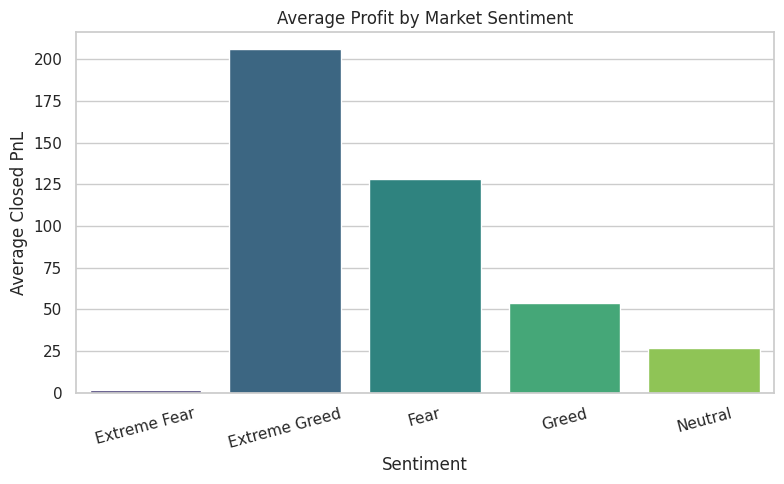

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sentiment', y='Closed PnL_mean', hue='Sentiment', data=grouped, palette='viridis', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Profit by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
plt.savefig("avg_profit_by_sentiment.png", dpi=300, bbox_inches='tight')

#### Goal: Compare overall profitability across sentiment categories.

Insights:

The average profit is highest under Extreme Greed, followed by Greed, and lowest under Extreme Fear.

This reinforces that bullish sentiment correlates with positive trading outcomes.

Neutral periods show small average profits, reflecting limited market movement.

/tmp/ipython-input-4117217343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Size USD_mean', data=grouped, palette='Blues')


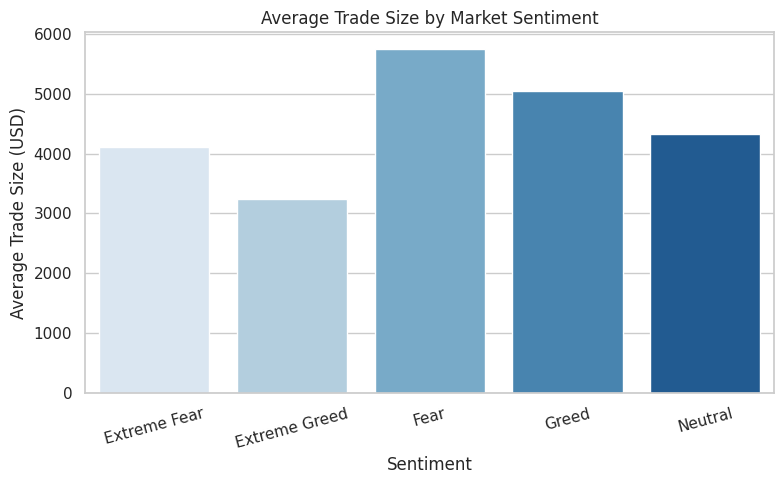

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sentiment', y='Size USD_mean', data=grouped, palette='Blues')
plt.title('Average Trade Size by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
plt.savefig("avg_trade_size_by_sentiment.png", dpi=300, bbox_inches='tight')

#### Goal: Understand how traders adjust position sizes based on market emotion.

Possible Insight Example:

Average trade sizes increase during Fear and Greed — traders tend to commit larger amounts during volatile conditions.
In Extreme Greed sentiment phases, average trade size decreases, indicating lower conviction in market direction.

#Summary

- Profits peak during Extreme Greed,
 while Extreme Fear phases show the lowest and most clustered returns.

- Trade volumes are highest in Fear and
 Greed conditions, reflecting increased market activity during emotional extremes.

- Closed PnL is moderately correlated
 with trade size, indicating larger trades often yield higher profits.

- Time-series trends show profits moving
 cyclically with sentiment, especially sharp swings in early April 2024.

- Overall, bullish sentiments align with higher profitability, while neutral or fearful markets show lower activity and returns.

#Conclusion

Market sentiment strongly influences trading behavior and profitability.

Traders are most active and profitable during Greed phases, while Fear leads to caution and reduced gains.

The Fear & Greed Index effectively captures these emotional and financial patterns, highlighting the link between trader psychology and market outcomes.